<a href="https://colab.research.google.com/github/KodumuruRaja/IMBalanced-Balanced-data/blob/main/Imbalanced-Data-Comparision-of-OverSampling-Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data=pd.read_csv("/content/fraud_data.csv")

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      21693 non-null  float64
 1   V2      21693 non-null  float64
 2   V3      21693 non-null  float64
 3   V4      21693 non-null  float64
 4   V5      21693 non-null  float64
 5   V6      21693 non-null  float64
 6   V7      21693 non-null  float64
 7   V8      21693 non-null  float64
 8   V9      21693 non-null  float64
 9   V10     21693 non-null  float64
 10  V11     21693 non-null  float64
 11  V12     21693 non-null  float64
 12  V13     21693 non-null  float64
 13  V14     21693 non-null  float64
 14  V15     21693 non-null  float64
 15  V16     21693 non-null  float64
 16  V17     21693 non-null  float64
 17  V18     21693 non-null  float64
 18  V19     21693 non-null  float64
 19  V20     21693 non-null  float64
 20  V21     21693 non-null  float64
 21  V22     21693 non-null  float64
 22

In [ ]:
pd.DataFrame({"Count": data["Class"].value_counts(), "Percentage": data["Class"].value_counts(normalize=True)})

,Count,Percentage
0,21337,0.983589
1,356,0.016411


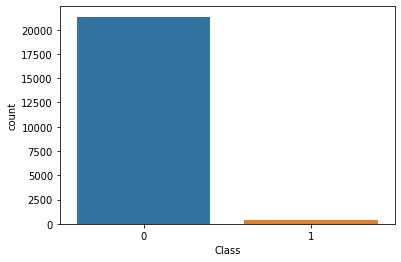

In [ ]:
sns.countplot(x="Class", data=data);

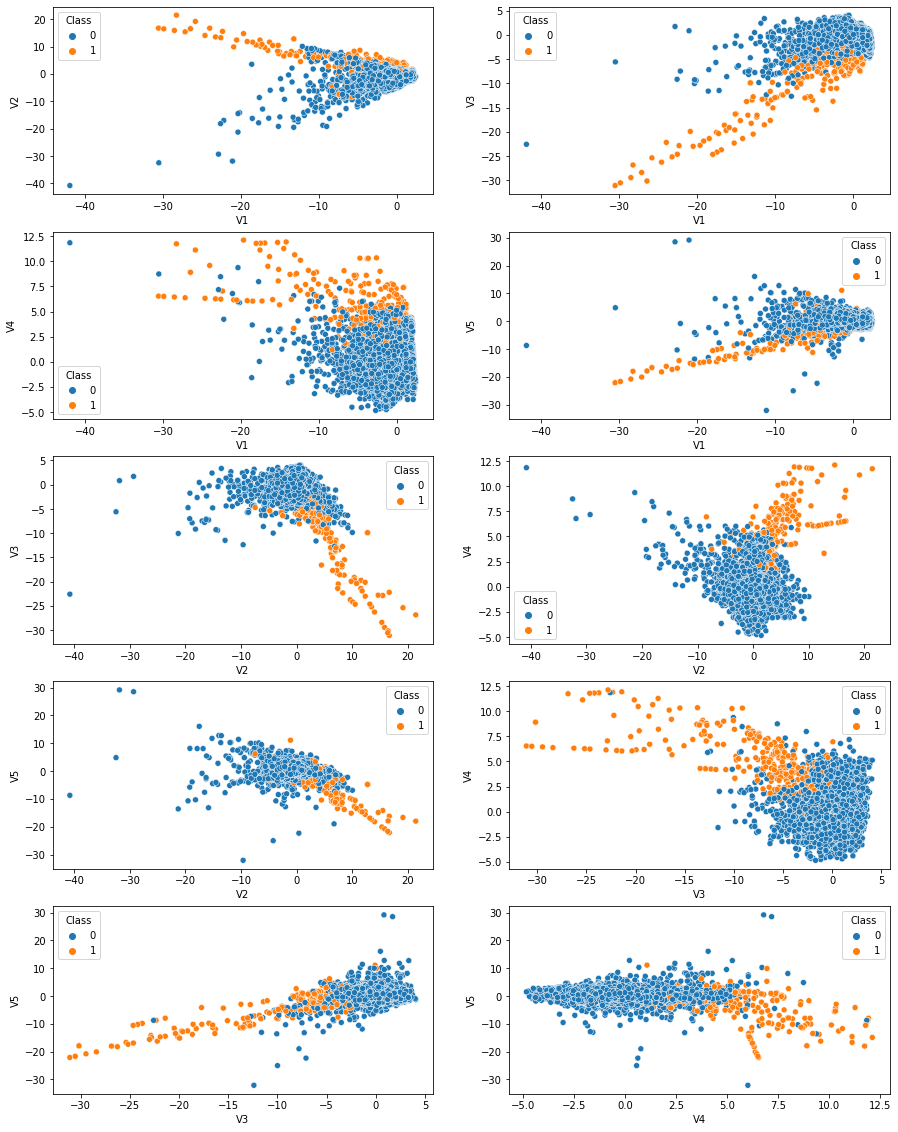

In [ ]:
pairs = list(combinations(data.columns[:5], 2))

fig, axes = plt.subplots(round(len(pairs) / 2), 2, figsize=(15, 20))
for idx, (x_col, y_col) in enumerate(pairs):
    i, j = divmod(idx, 2)
    sns.scatterplot(x=x_col, y=y_col, hue="Class", data=data, ax=axes[i, j])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:29]], data["Class"], train_size=0.8, stratify=data["Class"])

In [ ]:
smote = SMOTE(sampling_strategy=0.5)
bsmote = BorderlineSMOTE(sampling_strategy=0.5)
svmsmote = SVMSMOTE(sampling_strategy=0.5)
ros = RandomOverSampler(sampling_strategy=0.5)

In [ ]:
comparison_items = [{
    "name": "Original",
    "model": None,
    "X": X_train,
    "y": y_train
},{
    "name": "SMOTE",
    "model": smote,
    "X": None,
    "y": None
}, {
    "name": "Borderline SMOTE",
    "model": bsmote,
    "X": None,
    "y": None
}, {
    "name": "SVM SMOTE",
    "model": svmsmote,
    "X": None,
    "y": None
}, {
    "name": "Random Over-Sampler",
    "model": ros,
    "X": None,
    "y": None
}]
for item in comparison_items:
    if item["model"]:
        item["X"], item["y"] = item["model"].fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
def draw_comparisons(pair):
    fig, axes = plt.subplots(5, 1, figsize=(15, 30))
    for idx, item in enumerate(comparison_items):
        data = item["X"].copy()
        data["Class"] = item["y"]
        sns.scatterplot(x=pair[0], y=pair[1], hue="Class", data=data, ax=axes[idx], alpha=0.1)
        axes[idx].set_title("{0} ({1} vs {2})".format(item["name"], pair[0], pair[1]))

IndexError: ignored

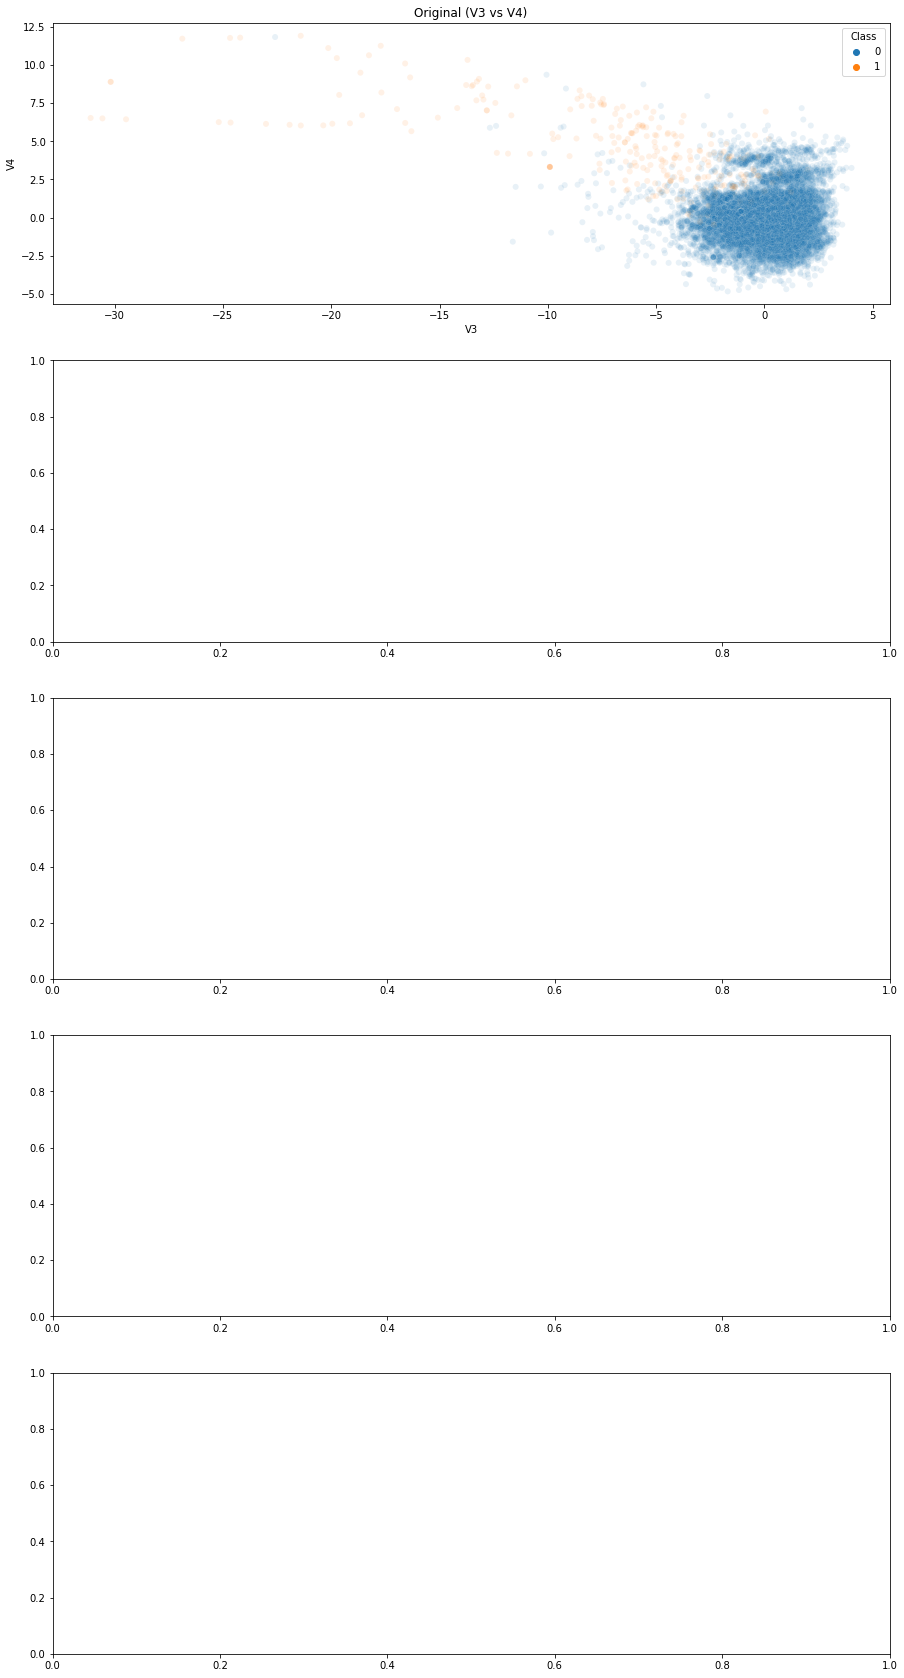

In [ ]:

# We can try using different pairs of predictors

# draw_comparisons(("V1", "V3"))
# draw_comparisons(("V1", "V4"))
draw_comparisons(('V3','V4'))

In [ ]:
cv = StratifiedKFold(n_splits=10)

for item in comparison_items:
    rfc = RandomForestClassifier()
    scores = cross_val_score(rfc, item["X"], item["y"], scoring="roc_auc", cv=cv)
    item["roc_auc_score"] = scores.mean()

In [ ]:
print("Cross-validation ROC AUC scores:\n")
for item in comparison_items:
    print(item["name"], ": ", item["roc_auc_score"])

Cross-validation ROC AUC scores:

Original :  0.9670940604135335
SMOTE :  0.9998379780742832
Borderline SMOTE :  0.9996837585771085
SVM SMOTE :  0.999564127143046
Random Over-Sampler :  1.0


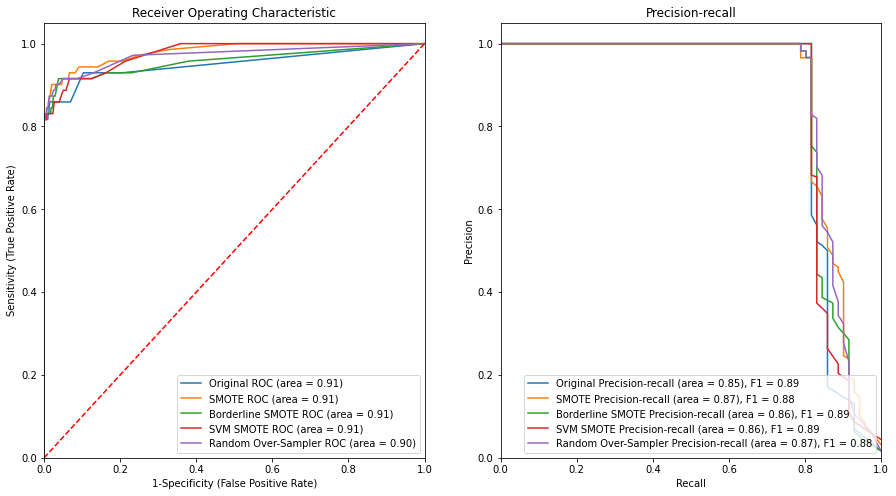

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

for item in comparison_items:
    rfc = RandomForestClassifier(n_estimators=200)
    rfc.fit(item["X"], item["y"])
    y_pred=rfc.predict(X_test)
    item["y_pred"] = y_pred

    # ROC
    fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
    auc_score = roc_auc_score(y_test,rfc.predict(X_test))
    ax1.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (item['name'], auc_score))
    
    # Precision-recall
    precision, recall, thresholds = precision_recall_curve(y_test, rfc.predict_proba(X_test)[:,1])
    auc_score = auc(recall, precision)
    f1 = f1_score(y_test, y_pred)
    ax2.plot(recall, precision, label='%s Precision-recall (area = %0.2f), F1 = %0.2f' % (item['name'], auc_score, f1))
    
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('1-Specificity (False Positive Rate)')
ax1.set_ylabel('Sensitivity (True Positive Rate)')
ax1.set_title('Receiver Operating Characteristic')
ax1.legend(loc="lower right")

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-recall')
ax2.legend(loc="lower right");